In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib

warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)

In [6]:
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing.......")
        try:
            import pip

            pip.main({"install", library_name})
        except:
            print("Error: Failed to install. Please install it manually.")

In [7]:
import os
if "amazon-product-reviews" not in os.listdir():
    check_and_install_library("opendatasets")
    import opendatasets as od

    od.download("https://www.kaggle.com/datasets/irvifa/amazon-product-reviews")

In [8]:
# load the dataframe and set column name
import pandas as pd 
df = pd.read_csv(
    "amazon-product-reviews/ratings_Electronics.csv",
    names=["userId", "productId", "ratings", "timestamp"],
)

In [9]:
df.shape

(7824482, 4)

In [10]:
df.columns

Index(['userId', 'productId', 'ratings', 'timestamp'], dtype='object')

In [11]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [12]:
del df

In [13]:
electronics_data.head()

,userId,productId,ratings,timestamp
0,A1ZWCRLZDLEL1U,B006ISG5M0,5.0,1359158400
1,A36A9YKYLBWT1T,B004ZKP5CE,3.0,1325030400
2,A12XVBWWF1K7QS,B008DWH00K,5.0,1379289600
3,A1YLKXFFC7UPWQ,B009SKNYY2,2.0,1359504000
4,A1T64GMC6IAA4P,B009K62HQ0,1.0,1393804800


In [14]:
electronics_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   ratings    1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [15]:
electronics_data.drop('timestamp',axis=1,inplace=True)

In [16]:
electronics_data.describe()

,ratings
count,1.564896e+06
mean,4.010985e+00
std,1.381381e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [17]:
electronics_data.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [18]:
electronics_data[electronics_data.duplicated()].shape[0]

0

In [19]:
electronics_data.head()

,userId,productId,ratings
0,A1ZWCRLZDLEL1U,B006ISG5M0,5.0
1,A36A9YKYLBWT1T,B004ZKP5CE,3.0
2,A12XVBWWF1K7QS,B008DWH00K,5.0
3,A1YLKXFFC7UPWQ,B009SKNYY2,2.0
4,A1T64GMC6IAA4P,B009K62HQ0,1.0


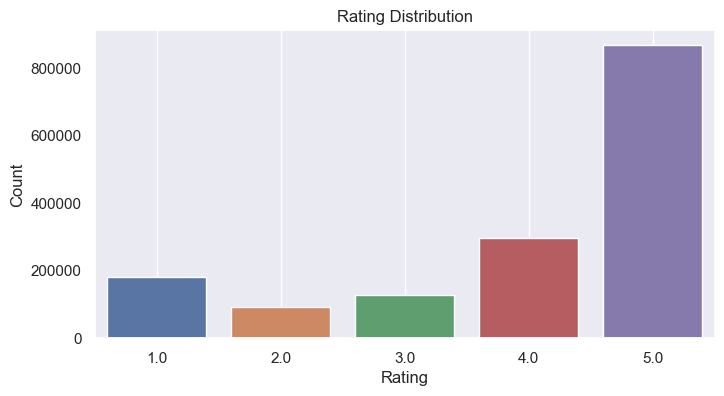

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x='ratings', data=electronics_data)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid()
plt.show()

In [21]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225205
Total unique products :  237732


In [22]:
no_of_ratied_products_per_user = electronics_data.groupby(by='userId')['ratings'].count().sort_values(ascending=False)
no_of_ratied_products_per_user.head()

userId
ADLVFFE4VBT8      109
A5JLAU2ARJ0BO     101
A3OXHLG6DIBRW8     86
A6FIAB28IS79       79
A680RUE1FDO8B      79
Name: ratings, dtype: int64

In [23]:
print('No of rated products more than 50 per user : {}'.format(sum(no_of_ratied_products_per_user >= 50)))

No of rated products more than 50 per user : 28


In [24]:
data = electronics_data.groupby('productId').filter(lambda x:x['ratings'].count()>=50)

KeyboardInterrupt: 

In [ ]:
data.head()

,userId,productId,ratings
5,A15P9UIN8IMFSO,B001GTT0VO,4.0
6,AHLBXITZWB2U5,B00829THK0,5.0
9,A15R1XWDSZCJKL,B0009YJXMS,5.0
11,A1S05KAAUNUTW4,B002JQNXZC,3.0
12,A1Y6F4OEZ99UVQ,B002MAPRYU,5.0


In [ ]:
no_of_rating_per_product = data.groupby('productId')['ratings'].count().sort_values(ascending=False)

In [ ]:
no_of_rating_per_product.head()

productId
B0074BW614    3592
B00DR0PDNE    3309
B007WTAJTO    2927
B006GWO5WK    2477
B0019EHU8G    2460
Name: ratings, dtype: int64

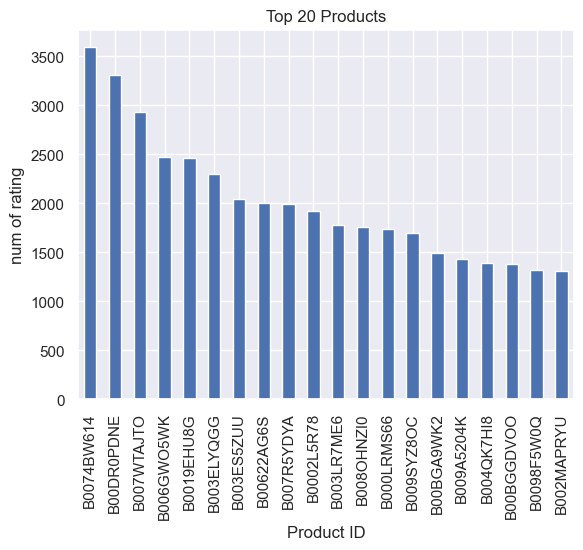

In [ ]:
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('Top 20 Products')
plt.show()

In [ ]:
mean_rating_products_count=pd.DataFrame(data.groupby('productId')['ratings'].mean())

In [ ]:
mean_rating_products_count.head()

,ratings
productId,
0972683275,4.509174
1400532655,3.771739
140053271X,4.035294
1400599997,2.980000
B00000DM9W,4.650000


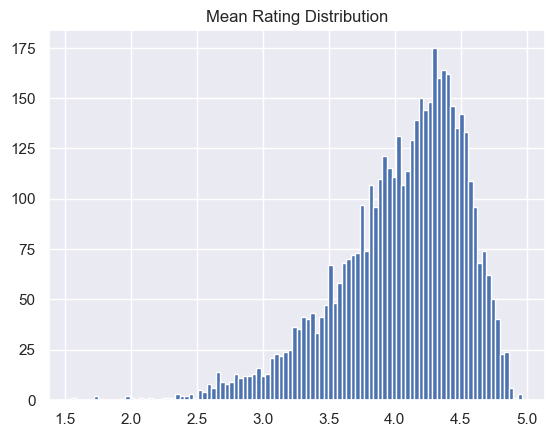

In [ ]:
plt.hist(mean_rating_products_count['ratings'],bins=100)
plt.title('Mean Rating Distribution')
plt.show()

In [ ]:
mean_rating_products_count['ratings'].skew()

-0.9322081402994095

In [ ]:
mean_rating_products_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['ratings'].count())

In [ ]:
mean_rating_products_count.head()

,ratings,rating_counts
productId,,
0972683275,4.509174,218
1400532655,3.771739,92
140053271X,4.035294,85
1400599997,2.980000,50
B00000DM9W,4.650000,80


In [ ]:
mean_rating_products_count[mean_rating_products_count['rating_counts']==mean_rating_products_count['rating_counts'].max()]

,ratings,rating_counts
productId,,
B0074BW614,4.466871,3592


In [ ]:
print('min average rating product : ',mean_rating_products_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_products_count[mean_rating_products_count['rating_counts']==mean_rating_products_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  101


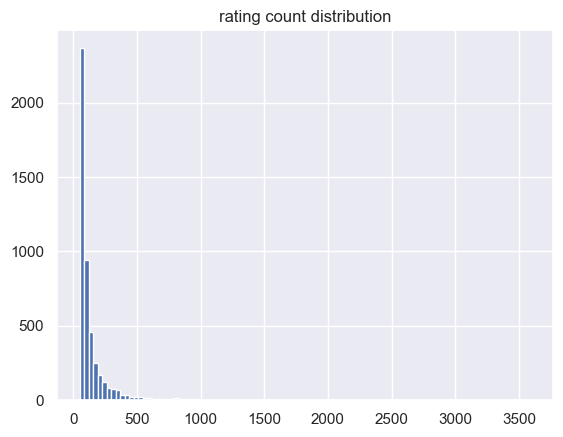

In [ ]:
plt.hist(mean_rating_products_count['rating_counts'],bins=100)
plt.title("rating count distribution")
plt.show()

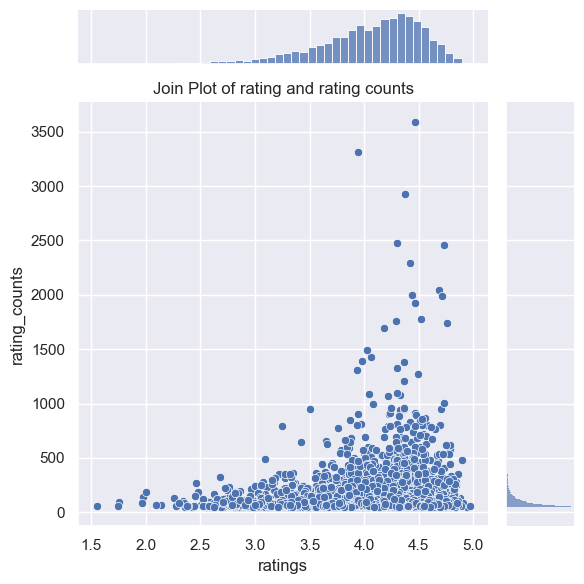

In [ ]:
sns.jointplot(x='ratings',y='rating_counts',data=mean_rating_products_count)
plt.title('Join Plot of rating and rating counts')
plt.tight_layout()
plt.show()

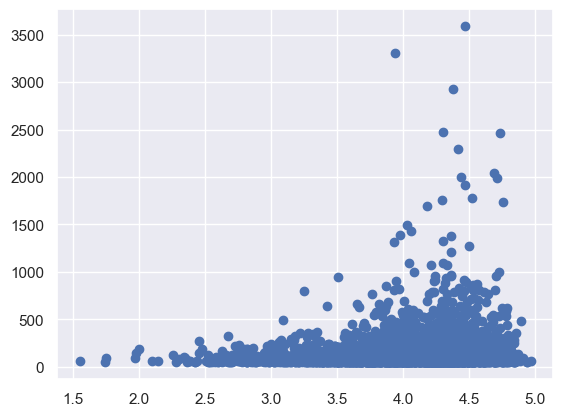

In [ ]:
plt.scatter(x=mean_rating_products_count['ratings'],y=mean_rating_products_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Count is : {}'.format(mean_rating_products_count['ratings'].corr(mean_rating_products_count['rating_counts'])))

Correlation between Rating and Rating Count is : 0.11458193410889268


In [ ]:
# def check_and_install_library(library_name):
#     try:
#         importlib.import_module(library_name)
#         print(f"{library_name} is already installed.")
#     except ImportError:
#         print(f"{library_name} is not installed. Installing.......")
#         try:
#             import pip

#             pip.main({"install", library_name})
#         except:
#             print("Error: Failed to install. Please install it manually.")


# check_and_install_library("surprise")

from surprise import KNNWithMeans

from surprise import Dataset
from surprise import accuracy

from surprise import Reader
from surprise.model_selection import train_test_split

In [25]:
reader = Reader(rating_scale=(1,5))
surprise_data = Dataset.load_from_df(data,reader)

In [26]:
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [ ]:
algo = KNNWithMeans(k=5,sim_options={'name' : 'pearson_baseline','user_based':False})
algo.fit(trainset)

In [ ]:
test_pred=algo.test(testset)

In [ ]:
print('Item-based Model : Test Set')
accuracy.rmse(test_pred, verbose=True)

In [ ]:
data2=data.sample(20000)
rating_matrix = data2.pivot_table(values='ratings',index='userId',columns='productId',fill_value=0)
rating_matrix.head()

In [ ]:
rating_matrix.shape

In [ ]:
x-rating_matrix=rating_matrix.T
x_rating_matrix.head()

In [ ]:
x_rating_matrix.shape

In [ ]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_rating_matrix)
decomposed_matrix.shape

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

In [ ]:
x_rating_matrix.index[10]

In [ ]:
i = 'B00001P4ZH'
product_names=list(x_ratings_matrix.index)
product_id = product_names.index(i)
print(product_id)

In [ ]:
correlation_production_ID = correlation_matrix[product_id]
correlation_production_ID.shape

In [ ]:
correlation_matrix[correlation_production_ID>0.75].shape

In [ ]:
recommend = list(x_rating_matrix.index[correlation_production_ID > 0.75])
recommend[:20]